# Assignment 1 Part A
Student Name: Matthias Si En Ong\
Student ID: 1590392

## Instructions
1. Ensure data files are in the same location as this Jupyter notebook.
2. Ensure that Python libraries are installed: Pandas, Matplotlib, Numpy, SciKitLearn

## Problem I: Q1

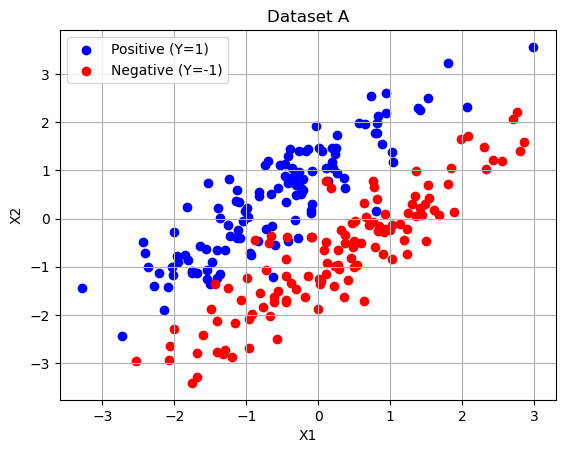

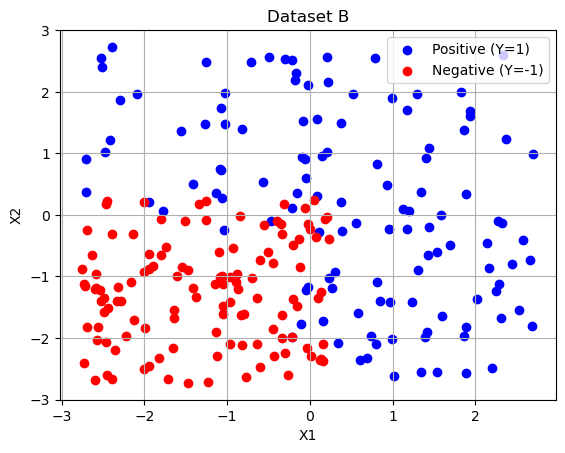

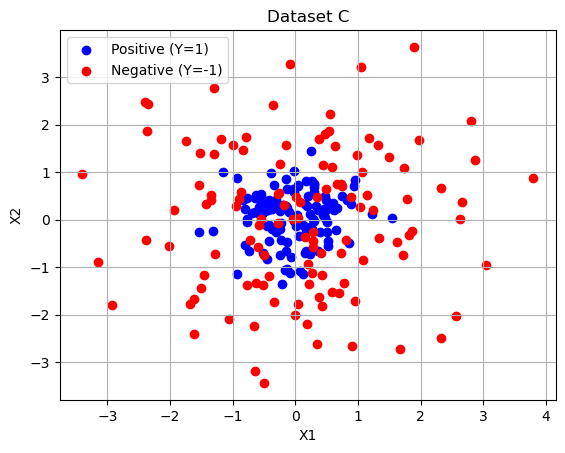

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a function to plot each dataset
def plot_dataset(df, title):
    
    # positive Y samples in blue
    plt.scatter(df[df['Y'] == 1]['X1'], df[df['Y'] == 1]['X2'], color='blue', label='Positive (Y=1)')
    # negative Y samples in red
    plt.scatter(df[df['Y'] == -1]['X1'], df[df['Y'] == -1]['X2'], color='red', label='Negative (Y=-1)')
    
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True)
    plt.show()

# load datasets, if files are in the same directory
df_a = pd.read_csv("clsf-a.csv")
df_b = pd.read_csv("clsf-b.csv")
df_c = pd.read_csv("clsf-c.csv")

plot_dataset(df_a, 'Dataset A')
plot_dataset(df_b, 'Dataset B')
plot_dataset(df_c, 'Dataset C')


## Problem I: Q2

In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# init classifiers
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=42)
gnb = GaussianNB()
logreg = LogisticRegression()

def compute_accuracy(X, y, classifier):
    classifier.fit(X, y)
    y_pred = classifier.predict(X)  # predict!
    return accuracy_score(y, y_pred)

datasets = [df_a, df_b, df_c]
dataset_names = ['A', 'B', 'C']
results = []

for idx, df in enumerate(datasets): # for each dataset
    # extract all features and labels
    X_train = df.iloc[:, :-1]
    y_true = df['Y'].values
    
    # compute accuracy for each classifier
    dtree_acc = compute_accuracy(X_train, y_true, dtree)
    gnb_acc = compute_accuracy(X_train, y_true, gnb)
    logreg_acc = compute_accuracy(X_train, y_true, logreg)
    
    # store results as percentage, 1dp
    results.append({
        'Dataset': dataset_names[idx],
        'Decision Tree Accuracy': f"{dtree_acc * 100:.1f}%",
        'Gaussian Naive Bayes Accuracy': f"{gnb_acc * 100:.1f}%",
        'Logistic Regression Accuracy': f"{logreg_acc * 100:.1f}%"
    })

# dataframe for easier reading
results_df = pd.DataFrame(results)
print(results_df)

  Dataset Decision Tree Accuracy Gaussian Naive Bayes Accuracy  \
0       A                  81.2%                         92.9%   
1       B                  95.0%                         90.4%   
2       C                  75.4%                         80.4%   

  Logistic Regression Accuracy  
0                        95.4%  
1                        85.0%  
2                        53.8%  


## Problem I: Q3

Logistic Regression classifier achieved the highest accuracy for Dataset A with an accuracy of 95.4%. As seen in the plot for Dataset A in Q1, the separation between the positive and negative samples is linear or close to it, making it easier for the logistic regression model to achieve higher accuracy as it is a linear classifier, performing well when the data is linearly separable. The high accuracy for the Naive Bayes model suggests that Gaussian Naive Bayes assumptions are relatively well-met, but the performance is still inferior to the logistic regression classifier and the assumptions may not be completely met. Lastly, the logistic regression classifier also outperforms the decision tree classifier as the diagonal linear separation between the data is more complex than what the tree can represent with such a shallow tree depth of 2.

## Problem I: Q4

For Dataset B, the Decision Tree classifier achieved the highest accuracy at 95.0%. As seen from the plot in Q1, Dataset B's can be split by 2 simple, axis-parallel splits. The depth of 2 is sufficient for capturing the 2 linear boundaries with 2 decision nodes for each axis. Meanwhile, Gaussian Naive Bayes classifier is less accurate compared to Decision Tree, although it is still reasonably accurate at 90.4%. A likely reason could be that the assumptions (features on the classes follow a Gaussian distribution/independence) do not perfectly hold for this dataset. Logistic regression is the least accurate here as the data is not really linearly separable.

## Problem I: Q5

Gaussian Naive Bayes performs the best here at 80.4%, although it is possibly violating some assumptions slightly that prevent it from being even more accurate. If we look at the plot, Dataset C's data is more complex compared to the other datasets. It does not have a clear linear separation and the points seem to be approximately following a normal distribution as they seem to be clustered around a point or a mean. Hence, linear regression is significantly more inaccurate at 53.8% as the data is not easily linearly separable. As for the decision tree classifier, it is less accurate than Gaussian Naive Bayes, showing that the dataset C has some complex relationships that the tree's max depth of 2 cannot capture adequately.

## Problem II: Q6

In [36]:
df = pd.read_csv('indep.csv')
# probs = df.value_counts(["X1", "X2"], normalize=True) method 2 
num_of_samples = len(df)
joint_counts = df.groupby(['X1', 'X2']).size()
print(joint_counts)

X1  X2
1   1     16
    2     30
2   1     17
    2     17
dtype: int64


In [37]:
joint_probabilities = joint_counts / num_of_samples
print(joint_probabilities)

X1  X2
1   1     0.2000
    2     0.3750
2   1     0.2125
    2     0.2125
dtype: float64


## Problem II: Q7

In [38]:
marginal_X1 = joint_probabilities.groupby('X1').sum()
marginal_X2 = joint_probabilities.groupby('X2').sum()
print(marginal_X1)
print(marginal_X2)

X1
1    0.575
2    0.425
dtype: float64
X2
1    0.4125
2    0.5875
dtype: float64


## Problem II: Q8

P(X1=1 and X2=1) = 0.2\
P(X1=1) = 0.575\
P(X2=1) = 0.4125\
P(X1=1)P(X2=1) = 0.2372 != P(X1=1 and X2=1) = 0.2

No X1 and X2 are not independent!

## Problem III: Q9

In [39]:
df = pd.read_csv("nb.csv")
# print(df.head())
num_of_samples = len(df)
groupedY = df.groupby('Y').size() # OR df.value_counts('Y')
print(groupedY/num_of_samples)

Y
-1    0.75
 1    0.25
dtype: float64


## Problem III: Q10

In [40]:
groupedX1 = df.groupby(['X1', 'Y']).size()
groupedX2 = df.groupby(['X2', 'Y']).size()
# print(groupedX1)
# print(groupedX2)
groupedY = df.groupby('Y').size()
print("P(X1 | Y)")
print((groupedX1/groupedY).round(3))

print("P(X2 | Y)")
print((groupedX2/groupedY).round(3))

P(X1 | Y)
X1  Y 
1   -1    0.256
     1    0.700
2   -1    0.744
     1    0.300
dtype: float64
P(X2 | Y)
X2  Y 
1   -1    0.489
     1    0.700
2   -1    0.511
     1    0.300
dtype: float64


## Problem III: Q11

When Y=1,P(Y=1|X1=1, X2=2) proportional P(Y=1) \* P(X1=1|Y=1)  \* P(X2=2|Y=1) = 0.25\*0.7\*0.3=0.0525\
When Y=-1 P(Y=-1|X1=1, X2=2) proportional P(Y=-1) \* P(X1=1|Y=-1)  \* P(X2=2|Y=-1) = 0.75\*0.256\*0.511=0.098112\
The argmax function would mean that Y=-1 will be classified for X1=1, X2=2, as 0.098112>0.0525.

## Problem IV: Q14

In [41]:
df = pd.read_csv('mle.csv')

N = len(df)
# λ= n/(∑xi)
lambda_optimal = N / df.sum()
# print(lambda_optimal)
print(f"Optimal λ = {lambda_optimal['X']:.3f}")


Optimal λ = 0.430


## Problem V: Q15

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

dataset_1 = pd.read_csv('regr-1.csv')
# dataset_2 = pd.read_csv('regr-2.csv')
dataset_3 = pd.read_csv('regr-3.csv')

# For dataset 1
X_train = dataset_1[['X1', 'X2']]
Y_true_1 = dataset_1['Y']
# print(Y_true_1)

# Test on dataset 3
X_test = dataset_3[['X1', 'X2']]
Y_true_3 = dataset_3['Y']

model = LinearRegression(fit_intercept=False) # no intercept, if inputs 0 i want Y=0
model.fit(X_train, Y_true_1)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_1 = mean_squared_error(Y_true_1, y_train_pred)
mse_3 = mean_squared_error(Y_true_3, y_test_pred)
print(f'MSE Using X1 and X2 on Dataset 1: {mse_1:.3f}')
print(f'MSE Using X1 and X2 on Dataset 3: {mse_3:.3f}')

# Using only X1
X_train = dataset_1['X1'].to_frame()
# print(X_train.to_frame())
X_test = dataset_3['X1'].to_frame()
model.fit(X_train, Y_true_1)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_1 = mean_squared_error(Y_true_1, y_train_pred)
mse_3 = mean_squared_error(Y_true_3, y_test_pred)
print(f'MSE Using X1 only on Dataset 1: {mse_1:.3f}')
print(f'MSE Using X1 only on Dataset 3: {mse_3:.3f}')

# Using only X2
X_train = dataset_1['X2'].to_frame()
# print(X_train.to_frame())
X_test = dataset_3['X2'].to_frame()
model.fit(X_train, Y_true_1)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_1 = mean_squared_error(Y_true_1, y_train_pred)
mse_3 = mean_squared_error(Y_true_3, y_test_pred)
print(f'MSE Using X2 only on Dataset 1: {mse_1:.3f}')
print(f'MSE Using X2 only on Dataset 3: {mse_3:.3f}')

# Not using any feature
predictions_1_zero = np.zeros_like(Y_true_1)
predictions_3_zero = np.zeros_like(Y_true_3)
mse_1 = mean_squared_error(Y_true_1, predictions_1_zero)
mse_3 = mean_squared_error(Y_true_3, predictions_3_zero)
print(f'MSE Using No Features on Dataset 1: {mse_1:.3f}')
print(f'MSE Using No Features on Dataset 3: {mse_3:.3f}')

MSE Using X1 and X2 on Dataset 1: 1.397
MSE Using X1 and X2 on Dataset 3: 1.148
MSE Using X1 only on Dataset 1: 1.431
MSE Using X1 only on Dataset 3: 1.077
MSE Using X2 only on Dataset 1: 2.159
MSE Using X2 only on Dataset 3: 2.547
MSE Using No Features on Dataset 1: 2.347
MSE Using No Features on Dataset 3: 2.226


## Problem V: Q16

In [43]:
dataset_2 = pd.read_csv('regr-2.csv')

# dataset 2
X_train = dataset_2[['X1', 'X2']]
Y_true_2 = dataset_2['Y']
# print(X_train)

# Test on dataset 3
X_test = dataset_3[['X1', 'X2']]
Y_true_3 = dataset_3['Y']

model = LinearRegression(fit_intercept=False) # no intercept, if inputs 0 i want Y=0
model.fit(X_train, Y_true_2)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_2 = mean_squared_error(Y_true_2, y_train_pred)
mse_3 = mean_squared_error(Y_true_3, y_test_pred)
print(f'MSE Using X1 and X2 on Dataset 2: {mse_2:.3f}')
print(f'MSE Using X1 and X2 on Dataset 3: {mse_3:.3f}')

# Using only X1
X_train = dataset_2['X1'].to_frame()
# print(X_train.to_frame())
X_test = dataset_3['X1'].to_frame()
model.fit(X_train, Y_true_2)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_2 = mean_squared_error(Y_true_2, y_train_pred)
mse_3 = mean_squared_error(Y_true_3, y_test_pred)
print(f'MSE Using X1 only on Dataset 2: {mse_2:.3f}')
print(f'MSE Using X1 only on Dataset 3: {mse_3:.3f}')

# Using only X2
X_train = dataset_2['X2'].to_frame()
# print(X_train.to_frame())
X_test = dataset_3['X2'].to_frame()
model.fit(X_train, Y_true_2)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_2 = mean_squared_error(Y_true_2, y_train_pred)
mse_3 = mean_squared_error(Y_true_3, y_test_pred)
print(f'MSE Using X2 only on Dataset 2: {mse_2:.3f}')
print(f'MSE Using X2 only on Dataset 3: {mse_3:.3f}')

# Not using any feature
# predictions_2_zero = pd.Series(0, index=Y_true_2.index) # alternative for future ref
predictions_2_zero = np.zeros_like(Y_true_2)
predictions_3_zero = np.zeros_like(Y_true_3)
mse_2 = mean_squared_error(Y_true_2, predictions_2_zero)
mse_3 = mean_squared_error(Y_true_3, predictions_3_zero)
print(f'MSE Using No Features on Dataset 2: {mse_2:.3f}')
print(f'MSE Using No Features on Dataset 3: {mse_3:.3f}')

MSE Using X1 and X2 on Dataset 2: 0.899
MSE Using X1 and X2 on Dataset 3: 1.072
MSE Using X1 only on Dataset 2: 0.931
MSE Using X1 only on Dataset 3: 1.055
MSE Using X2 only on Dataset 2: 1.717
MSE Using X2 only on Dataset 3: 2.206
MSE Using No Features on Dataset 2: 1.736
MSE Using No Features on Dataset 3: 2.226


## Problem V: Q17

In [44]:
print("Number of Samples in Dataset 1:", len(dataset_1))
print("Number of Samples in Dataset 2:", len(dataset_2))

Number of Samples in Dataset 1: 20
Number of Samples in Dataset 2: 100


Using more training data in Dataset 2 generally leads to lower MSE, thus leading to better results. This is because the model has more data to train and understand the linear relationship in the data, the data is also more likely to capture the underlying patterns in the data. Additionally, I can also see that X1 is a better predictor of Y compared to X2 as in both models trained with both datasets, a lower MSE score is achieved with X1 only compared to X2. Lastly, training with no features on leads to high MSE as there is no learning involved since it is just predicting a constant value. There is also no difference in the performance when tested on Dataset 3 when trained with no features.